# <font color='DarkSlateBlue'>Udacity - Intro Data Analysis</font>
## <font color='NavyBlue'>Titanic Data</font>

__ "The Titanic was thought to be the most luxurious and safest ship of its time, generating legends that were supposedly "unsinkable"." __ 

The voyage that culminated in the sinking of the RMS Titanic began in Southampton / United Kingdom on 10/04/1912, passing through Cherbourg-Octeville / France and Queenstown / Ireland. On April 14 he collided with an iceberg and sank, the next morning, with another 1500 people on board.

A curious fact, which may have helped us in our analysis of data, was that during the evacuation of the passengers Captain Smith went to two officers (Lightoller and Murdoch) and said, "put the women and children and lower them." The two interpreted the order differently, and Ligthtoller understood that they could only board women and children, and when there was no one in that group, he would throw the empty boats. Murdoch allowed men to board after women and children. Because they did not know the total number of people the boat held, several were thrown at half their capacity unused.

Source: https://en.wikipedia.org/wiki/RMS_Titanic

### Questions that will guide the analysis:

1. Knowing that there was this misunderstanding in the distribution of passengers by boat, the data source titanic.cvs provides us with some information that reflects this misunderstanding among the officers?
2. Women and children had a better chance of surviving?
3. Was the class an important factor for survival?
4. And the question I ask myself is if I were there, woman, young adult, in the 2nd class is it likely that I would have survived?

No more doubts, let's start analyzing the data!

## Preparing the Environment: Importing Libraries and Data

In [1]:
#importando as bibliotecas
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import pandas as pd
import numpy as np

In [2]:
#Machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn import  model_selection, tree, preprocessing

In [3]:
filename = 'titanic_data.csv'
titanic_df = pd.read_csv(filename, header=0)

In [4]:
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

## Working the data

At this stage we will clean the data and remove everything that may interfere with the result of the analysis and the prediction of data. Like everything else, you might consider null values, columns with many null values, columns with information that is not relevant to the focus of the analysis, values well above or below average, and zero values. The numbers and the decision to keep or not a data will be demonstrated in this section.

**Knowing the columns of the dataset better:**

- Embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
- Parch: Number of parents and children on board
- Pclass: Class that the passenger boarded (1 = 1st class, 2 = 2nd class, 3 = 3rd class)
- Sex: Female (female) or male (male)
- Sibsp: Number of brothers and wife on board
- Survived: 0 - Did not survive and 1 = survived

From the questions that have been raised we will assume that the variables that should be investigated further are:
- Age
- Sex
- SibSp + Parch
- Class

In [5]:
# Verifica  o tipo dos dados criados
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Manipulating variables

#### 1st type of manipulation: missing values

The existence of columns with missing data will be checked because these absences may interfere with the analysis. The treatment of missing data will take into account the percentage (%) of absences and the relevance of the information to the conclusion.
We begin this process by identifying which columns are missing values by counting the existing values and dividing by the total number of rows in the column.
colunas com valores ausentes através da contagem dos valores existentes e divisão pelo total de linhas da coluna.

In [6]:
((len(titanic_df) - titanic_df.count()) / len(titanic_df)) *100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

** Missing Values: Age **

20% of the data in the Age column is missing. We know that age was one of the selection criteria that allowed the passenger to enter the lifeboat. So, assuming an importance, I will not choose to delete the column or the rows without values. For this case, a good strategy will be to assign the average of the column to all absent.

In [7]:
titanic_df.Age.fillna(0).describe()

count    891.000000
mean      23.799293
std       17.596074
min        0.000000
25%        6.000000
50%       24.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

Assigning the column mean in all cells with NaN values:

In [8]:
titanic_df.Age = titanic_df.Age.fillna(titanic_df.Age.mean())

**Missing Values: Cabin**

In [9]:
titanic_df.Cabin.describe()

count             204
unique            147
top       C23 C25 C27
freq                4
Name: Cabin, dtype: object

* 77% of the column is composed of null values. Of the 204 existing values, 147 are unique and the most repeated records appear only 4 times. As top were listed the values C23, C25, C27, they are all started by the letter C, which may indicate the existence of a pattern in the field assembly. This possibility will not be investigated in this analysis, and the field will be excluded due to the high percentage of nulls.

** Missing Values: Embarked ** 

Embarked has very few missing values (0.2%), in which case it would be appropriate to exclude these records, but the port where the passenger embarked has no relevance in the perspective of this analysis. This column will be deleted completely at the end of this section.

In [10]:
# Embarked NaN values
titanic_df.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

#### 2nd Type of manipulation: Derived data 

During the analysis it may be necessary to create other data from the existing ones, this feature will be used whenever a benefit is identified in seeing the information from another perspective or accessing it more easily.
	
** Derived data: Family **

* The SibSp and Parch variables have the same information root (total of companions), to facilitate the analysis, a new derived column called Family will be created that will contain the total number of companions (SibSp + Parch). Does being with someone have any importance for survival? Having all the information in one column will make it easier to analyze.

In [11]:
# Create a new column: Family
titanic_df['Family'] = titanic_df['SibSp'] + titanic_df['Parch']

** Derived data: Age group (AgeRange) **

The AgeRange column will be created to facilitate analysis of the surviving age group. Despite being 32 years old, I will expand the search for age so that the analysis does not get so punctual.

In [12]:
def age_range(idade):
    """ 
    Returns the age range for the given age.

     Args:
         Age: Value number representing age.
     Returns:
         Returns a string with the age range identified for age.
         Values Domain = Elderly, Adult, Young Adult, Teen and Child.
    """    
    
    if idade >= 65:
        return 'Elderly'
    elif idade >= 33:
        return 'Adult'
    elif idade >= 18:
        return 'Young Adult'
    elif idade >= 12:
        return 'Teen'
    else:
        return 'Child'    

In [13]:
# Calls the age_range function passing as the Age column parameter and assigns the result to the new AgeRange column
titanic_df['AgeRange']= titanic_df.Age.apply(age_range) 

In [14]:
titanic_df.AgeRange.describe()

count             891
unique              5
top       Young Adult
freq              512
Name: AgeRange, dtype: object

My "Young Adult" group is the most frequent of the data set. See the data distribution:

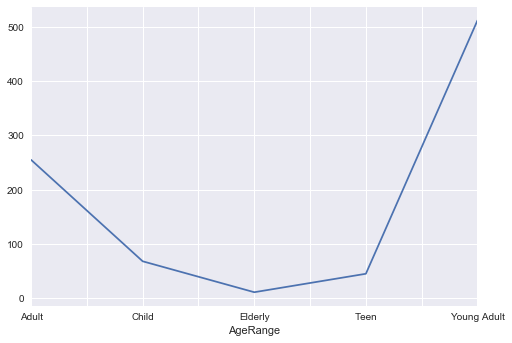

In [15]:
# Print chart with total passengers by age group.
titanic_df.groupby(['AgeRange']).size().plot()

#### 3rd Type of handling: Irrelevant or inappropriate data

- Embarked, Ticket, Passenger and Name are irrelevant columns for the context of the analysis.
- Knowing where your passenger's name or your identification number will not interfere with the type of analysis that will be done.
- Embarked and Ticket are variables that can, in another analysis, be deepened. This will not be done in this study.


The last step of the manipulation is to exclude from the dataset the variables considered irrelevant or inadequate. SibSp and Parch will be deleted because their contents are replicated in the Family column.

In [16]:
# Delete columns
titanic_df.drop(['PassengerId','SibSp', 'Parch', 'Cabin','Embarked', 'Ticket','Name'], axis=1, inplace=True)

titanic_df.head()

Survived  Pclass     Sex   Age     Fare  Family     AgeRange
0         0       3    male  22.0   7.2500       1  Young Adult
1         1       1  female  38.0  71.2833       1        Adult
2         1       3  female  26.0   7.9250       0  Young Adult
3         1       1  female  35.0  53.1000       1        Adult
4         0       3    male  35.0   8.0500       0        Adult

## Statistical summary

Applied to numerical values

- Count: Total non-null element
- Mean
- Std: Standard Deviation
- Min: Highest sample value
- Max: Lowest sample value
- 25%: Quartile 1, corresponds to 25% of the sample
- 50%: Quartile 2 or sample median
- 75%: Quartile 3, corresponds to% of sample

In [17]:
titanic_df.describe()

Survived      Pclass         Age        Fare      Family
count  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118   32.204208    0.904602
std      0.486592    0.836071   13.002015   49.693429    1.613459
min      0.000000    1.000000    0.420000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    7.910400    0.000000
50%      0.000000    3.000000   29.699118   14.454200    0.000000
75%      1.000000    3.000000   35.000000   31.000000    1.000000
max      1.000000    3.000000   80.000000  512.329200   10.000000

**Comments:**

- All rows of all columns are populated with 891 records each.
- The age of the passengers is between 0.42 and 80 years.

### Every time is time to work the data

In spite of having treated the data in the 'Working the data' section, when describing the data in the 'statistical summary', I realized that the data set gives the impression that the passengers were accompanied, the lowest crossing value is 0 and the largest Is 512, far from the average that is 32.

We will investigate and treat these variables.

* Average Family

The Family average is 0.9, giving the impression that most of the passengers were accompanied. Confirming this information:

In [18]:
((len(titanic_df.Family) - titanic_df[titanic_df['Family']>0].count()) / len(titanic_df.Family)) *100

Survived    60.26936
Pclass      60.26936
Sex         60.26936
Age         60.26936
Fare        60.26936
Family      60.26936
AgeRange    60.26936
dtype: float64

60% of passengers were unaccompanied. Well, if most of the passengers were unaccompanied, it is possible that the total number of passengers is close to the total number of passengers.

In [19]:
# Sum Family
titanic_df.Family.sum()

806

The sum of family members is almost similar to the total of the Family column. When averaged, you get the impression that most of the passengers are accompanied.

Checking if any pattern in this data:

In [20]:
# List the unique values of family
titanic_df.Family.unique()

array([ 1,  0,  4,  2,  6,  5,  3,  7, 10], dtype=int64)

We already know that most of the passengers were unaccompanied, is there a different relationship of this variable with the dead and survivors?

It groups the data of Family and Survived, in order to find out if there is a relation between the number of companions and the survival.

In [21]:
acompanhante_sobrevivencia = titanic_df.groupby(['Family','Survived']).size()
acompanhante_sobrevivencia

Family  Survived
0       0           374
        1           163
1       0            72
        1            89
2       0            43
        1            59
3       0             8
        1            21
4       0            12
        1             3
5       0            19
        1             3
6       0             8
        1             4
7       0             6
10      0             7
dtype: int64

Viewing the survivor distribution map by number of companions:

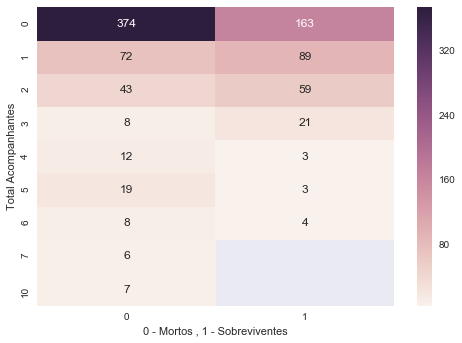

In [22]:
sb.heatmap(acompanhante_sobrevivencia.unstack(), annot=True, fmt='g')
plt.xlabel('0 - Mortos , 1 - Sobreviventes')
plt.ylabel('Total Acompanhantes')

Through the chart it is possible to confirm that most of the passengers were unaccompanied. If the analysis were based only on these two columns, regardless of class, sex and passage value, being unaccompanied would make the group less likely to survive.

#### 4th Type of manipulation: Outliers

We treat absent, irrelevant, and derivative data, now we find a new kind of data that needs to be manipulated, because the discrepancy of its content can significantly influence / induce the end result.

** Disagreeable data: Fare **

Fare has two issues that need to be evaluated. The first is the maximum price of the ticket is 512 being the average value 32. I will delve into the analysis of this data because these outliers can interfere in the result. The second is that the minimum value is 0. It can be, for example, children's tickets. This will be verified next.

Question 1: Is Fare's greatest value really discrepant?

In [23]:
# Sort the data in descending order to see if there are many high values such as max = 512.
titanic_df.Fare.sort_values(ascending=False).head(30)

679    512.3292
258    512.3292
737    512.3292
341    263.0000
438    263.0000
88     263.0000
27     263.0000
311    262.3750
742    262.3750
299    247.5208
118    247.5208
716    227.5250
557    227.5250
380    227.5250
700    227.5250
527    221.7792
377    211.5000
689    211.3375
730    211.3375
779    211.3375
318    164.8667
856    164.8667
268    153.4625
332    153.4625
609    153.4625
297    151.5500
305    151.5500
498    151.5500
708    151.5500
31     146.5208
Name: Fare, dtype: float64

The highest amount (512.3292) is very far from the second highest value (263.0000). The other values are pretty close to each other. Unless there are 3 luxury cabins with an exorbitant fare, which I do not believe, there is probably a flaw in the data. For passengers with the ticket equal to the highest value, I will assign the second highest value.

In [24]:
# Lists the 10 largest Fare values, but the list has repeated values, then filters
# Only unique (.unique) and returns the second line [1], because the first is the Max. 
second_max_fare = titanic_df.Fare.nlargest(10).unique()[1]
second_max_fare

263.0

In [25]:
# Assigns the second highest value in the column (second_max_fare)
# Where Fare is equal to the maximum value of the column
titanic_df.Fare = titanic_df.Fare.apply(lambda x: second_max_fare if x==titanic_df.Fare.max() else x)

In [26]:
# Checks whether the max has been changed to the second value.
titanic_df.Fare.max()

263.0

Question 2: Are the values zeroed out of children or the elderly? Do they have any factor in common?

In [27]:
# Search result where the value of the passage is equal to 0.
titanic_df[titanic_df['Fare']==0]

Survived  Pclass   Sex        Age  Fare  Family     AgeRange
179         0       3  male  36.000000   0.0       0        Adult
263         0       1  male  40.000000   0.0       0        Adult
271         1       3  male  25.000000   0.0       0  Young Adult
277         0       2  male  29.699118   0.0       0  Young Adult
302         0       3  male  19.000000   0.0       0  Young Adult
413         0       2  male  29.699118   0.0       0  Young Adult
466         0       2  male  29.699118   0.0       0  Young Adult
481         0       2  male  29.699118   0.0       0  Young Adult
597         0       3  male  49.000000   0.0       0        Adult
633         0       1  male  29.699118   0.0       0  Young Adult
674         0       2  male  29.699118   0.0       0  Young Adult
732         0       2  male  29.699118   0.0       0  Young Adult
806         0       1  male  39.000000   0.0       0        Adult
815         0       1  male  29.699118   0.0       0  Young Adult
822         0       1  male  38.000000   0.0       0        Adult

The theory that they could be free tickets because of age was not confirmed. In the group there are no children or elderly people. In common the data has the masculine gender and absence of companions. I believe it is more likely a failure in the data and for this case I will assign the average value of the Fare column.

In [28]:
# Returns the average of the Fare column when the value passed as parameter is equal to 0.
titanic_df.Fare = titanic_df.Fare.apply(lambda x: titanic_df.Fare.mean() if x==0 else x)  

In [29]:
# Summary
titanic_df.Fare.describe()

count    891.000000
mean      31.892741
std       43.062619
min        4.012500
25%        7.925000
50%       15.100000
75%       31.364716
max      263.000000
Name: Fare, dtype: float64

As can be seen, the minimum value (min) became 4.01 and the maximum (max) 263.

## Some more statistics
### Pearson's Correlation
What is the correlation of variables as a survival factor? The pearson (.corr) method was used to demonstrate the dependency between them. The value can vary between 0 and 1, both negative and positive. A degree of correlation greater than 0.5 is expected to demonstrate a moderate to very strong correlation.    

In [30]:
titanic_df.corr(method='pearson', min_periods=1)

Survived    Pclass       Age      Fare    Family
Survived  1.000000 -0.338481 -0.069809  0.264212  0.016639
Pclass   -0.338481  1.000000 -0.331339 -0.609074  0.065997
Age      -0.069809 -0.331339  1.000000  0.099607 -0.248512
Fare      0.264212 -0.609074  0.099607  1.000000  0.250601
Family    0.016639  0.065997 -0.248512  0.250601  1.000000

As the Sex column is not numerical, no correlation was calculated for it. I believe it has a correlation with survived, so I'm going to turn it into a number, in an additional column, to measure the correlation.

In [31]:
# Assign an integer value to the categorized values of Sex (0 - female, 1 - male)
titanic_df['SexInt'] = map(int, titanic_df.Sex == 'male')

In [32]:
# Calls the correlation method by passing the pearson type as a parameter and saves the values in a dataframe.
correlation_df = titanic_df.corr(method='pearson', min_periods=1).abs()
correlation_df

Survived    Pclass       Age      Fare    Family    SexInt
Survived  1.000000  0.338481  0.069809  0.264212  0.016639  0.543351
Pclass    0.338481  1.000000  0.331339  0.609074  0.065997  0.131900
Age       0.069809  0.331339  1.000000  0.099607  0.248512  0.084153
Fare      0.264212  0.609074  0.099607  1.000000  0.250601  0.202137
Family    0.016639  0.065997  0.248512  0.250601  1.000000  0.200988
SexInt    0.543351  0.131900  0.084153  0.202137  0.200988  1.000000

The purpose of this analysis is to score the correlation between the variables in our data set, with no intention to establish, through these numbers, a cause for survival or to define statistical values without associated controlled test.
It was important to add SexInt to represent the Sex variable. Sex (SexInt) and Pclass are the most correlated with Survived. It makes sense if we think that the location of the cabin may have made a difference and that women and children have taken priority in an emergency situation. Pclass and Fare are also correlated, mainly because the type / class cabin are factors for composition of ticket values.

**Result classification - correlation _p_**

In [33]:
correlation_df.unstack().sort_values(ascending=False)

SexInt    SexInt      1.000000
Family    Family      1.000000
Pclass    Pclass      1.000000
Age       Age         1.000000
Fare      Fare        1.000000
Survived  Survived    1.000000
Fare      Pclass      0.609074
Pclass    Fare        0.609074
Survived  SexInt      0.543351
SexInt    Survived    0.543351
Pclass    Survived    0.338481
Survived  Pclass      0.338481
Pclass    Age         0.331339
Age       Pclass      0.331339
Fare      Survived    0.264212
Survived  Fare        0.264212
Fare      Family      0.250601
Family    Fare        0.250601
Age       Family      0.248512
Family    Age         0.248512
SexInt    Fare        0.202137
Fare      SexInt      0.202137
SexInt    Family      0.200988
Family    SexInt      0.200988
SexInt    Pclass      0.131900
Pclass    SexInt      0.131900
Fare      Age         0.099607
Age       Fare        0.099607
SexInt    Age         0.084153
Age       SexInt      0.084153
          Survived    0.069809
Survived  Age         0.069809
Pclass  

=> Moderate correlation _p_>0.5
* Survived x SexInt
* Pclass   x Fare

=> Weak correlation _p_ >0.3
* Pclass   x Survived
* Pclass   x Age

=> Very Weak correlation
* Survived x Fare    
* Family   x Fare
* Family   x Age
* Fare     x SexInt 
* Family   x SexInt 
* Pclass   x SexInt     
* Age      x Fare       
* Age      x SexInt  
* Survived x Age 
* Pclass   x Family 
* Survived x Family 

## Viewing the data - Exploratory analysis


Data is clean and ready for viewing.

We will begin the exploratory analysis with an overview of all the columns and the relationship of your data. The data are grouped into 0 -Died and 1-Survived

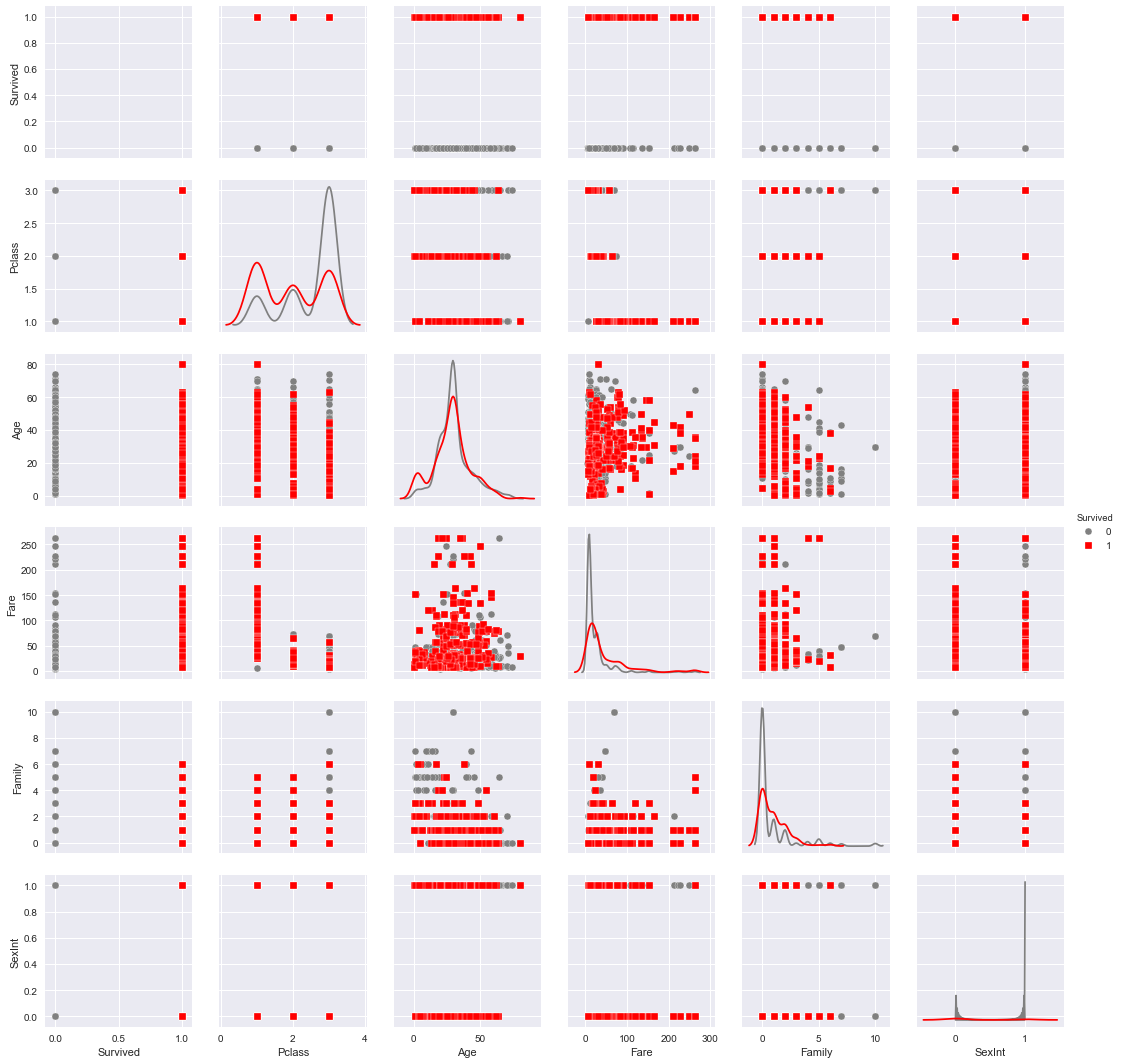

In [68]:
# Overview of all variables with the help of pairplot ().
sb.pairplot(titanic_df, hue='Survived', diag_kind='kde', size=2.5, markers=['o','s'], palette=['gray','red'])

This overview helps you choose which data to select for a more detailed view. For example, in SexInt it is clear that more men died on the Titanic. In Pclass can be perceived a greater volume of dead in the 3rd class.

### Viewing Age and Pclass

Through the graphs we will try to understand better the content and importance of the age for the survival, in addition to its relationship with the class - Pclass.

In [35]:
fig = plt.figure(figsize=(18,6), dpi=1600) 

# Create subplot1 
ax1 = plt.subplot(2,2,1)
# Histogram Column Age
titanic_df.Age.hist(bins=10) 
# Label x - Age
plt.xlabel("Age")
# Title
plt.title("Histrogram Age, (bin=10)")    

# Create subplot2 
ax2 = plt.subplot(2,2,2)
# Plot density of column Age
titanic_df['Age'].plot(kind='kde', style='k--')
# Label y
plt.ylabel("Density")
# Label x
plt.xlabel("Age")
# Title
plt.title("Densidade - Age")

# Create subplot3
ax3 = plt.subplot(2,2,(3,4))
# Plot density - Class
titanic_df.groupby('Pclass').Age.plot.kde()
# Label do eixo de x
plt.xlabel("Age")  
# Title
plt.title("Distribution Age/Class")
# Legend
plt.legend(('1 Class', '2 Class','3 Class'),loc='best') 

- Most passengers are between 20 and 40 years old.
- The third class has the majority of young passengers and the 1st has a more even distribution of the ages, including most elderly passengers.
- The distribution of age histogram is normal.

### Analyzing Survived, Pclass and Sex

In [36]:
fig = plt.figure(figsize=(18,6), dpi=1600) 

# Create subplot1 
ax1 = plt.subplot(1,2,1)
# Plot density - Pclass
titanic_df.groupby('Pclass').Survived.plot.kde()

# Label x and y
plt.xlabel("0 - Died  1 - Survived")
plt.ylabel("Density")
# Title
plt.title("Distribution Survived by Class")
# Legend
plt.legend(('1 Class', '2 Class','3 Class'),loc='best') 

# Create subplot2 
ax2 = plt.subplot(1,2,2)
# Plot Count Male and Female
titanic_df.groupby('Sex').count()['Survived'].plot.bar()
plt.xlabel("Female - Male")
# Title
plt.title("Number of female and male")

* The distribution of deaths and survivors by class leaves no doubt about the relationship between these variables. The highest death volume are in the 3rd class and survivors in the 1st. The second class has a small variation. The relationship between class and survival was one of the issues raised early in the paper. It is not possible to say that being in a certain class is the cause of survival, through the data it is only possible to observe that most of the survivors were in the first class. 

* In the data set the majority of passengers were men.

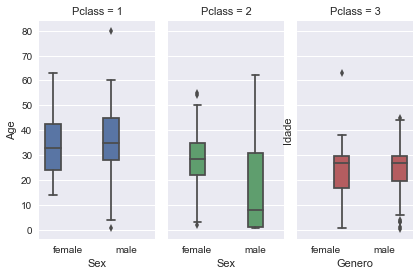

In [37]:
# Create survived
sobreviventes = titanic_df[titanic_df['Survived']==1]

sb.factorplot(x="Sex", y="Age", hue="Pclass",
               col="Pclass", data=sobreviventes, kind="box", size=4, aspect=.5)

# Label x and y
plt.xlabel("Genero")
plt.ylabel('Idade')

* Through the above graphics we began to trace part of the profile of the survivors, we know that most were in the third class and they were between 20 and 40 years.
* In the 2nd class, the object of the investigation, the majority of the survivors was between 25 and 35 years old.
* Most surviving men in the 2nd class were at most 30 years old.

### Responding to initial questions

Now that we know the data better and begin to identify the characteristics most common to the survivors, we will try to answer the questions that motivated this analysis with a more detailed investigation.

** Question 1: Knowing that there was this misunderstanding in the distribution of passengers by boats, the data source titanic.cvs gives us some information that reflects this misunderstanding among the officers? **

We know so far that most of the passengers were men, Young adult was the most common age group and that most of the dead were in the 3rd class. Titanic officials have prioritized children and women and it is to be expected, therefore, that men have a lower survival rate.

No detailed analysis will be done in the Age column, we will use the AgeRange derived column that contains the age range of the passenger.

[<matplotlib.text.Text at 0x13fc6748>, <matplotlib.text.Text at 0x15d85e48>]

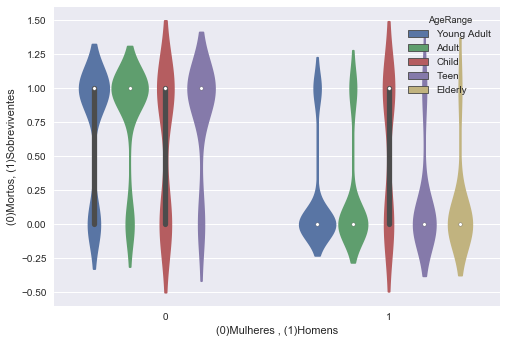

In [38]:
# Plot violinplot with survivor distribution by sex and age group
ax = sb.violinplot(data=titanic_df, x='SexInt', y='Survived', hue='AgeRange')
ax.set(xlabel='(0)Mulheres , (1)Homens', ylabel='(0)Mortos, (1)Sobreviventes')

In the above chart it is very clear that, at least in the sample given to us, the majority of women survived regardless of age. Most of the men died, including the elderly. In both men and women the volume of surviving children is similar to that of the dead. Averages for the age group and gender.

** Question 2: Were women and children more likely to survive? **

Let's start with the survival rate of men and women regardless of age.

In [39]:
# Group by Sex
titanic_df.groupby(['Sex']).mean()

Survived    Pclass        Age       Fare    Family  SexInt
Sex                                                               
female  0.742038  2.159236  28.216730  43.685776  1.343949     0.0
male    0.188908  2.389948  30.505824  25.475041  0.665511     1.0

In the data set 74% of the women and 19% of the men survived. Good news for me, but will it be that if I add the Age Range, the percentage of survival remains favorable?

In [40]:
# Group by Age Range and Sex 
titanic_df.groupby(['AgeRange','Sex']).mean()

Survived    Pclass        Age       Fare    Family  SexInt
AgeRange    Sex                                                               
Adult       female  0.824176  1.670330  43.285714  61.367536  1.263736     0.0
            male    0.182927  1.981707  43.643293  32.306215  0.512195     1.0
Child       female  0.593750  2.687500   4.796875  27.956378  3.031250     0.0
            male    0.555556  2.583333   4.546389  35.282292  3.555556     1.0
Elderly     male    0.090909  1.727273  69.772727  28.905691  0.272727     1.0
Teen        female  0.826087  2.217391  15.413043  39.497470  1.130435     0.0
            male    0.136364  2.818182  15.909091  20.670082  1.500000     1.0
Young Adult female  0.714286  2.315476  26.268174  37.677630  1.095238     0.0
            male    0.159884  2.558140  26.637182  21.389572  0.395349     1.0

In the group of young adult women the survival rate is 71%, well over 16% of men in this age group. With the exception of children, men in all age groups had a low survival rate. Children, regardless of gender, had a similar rate, 59% for girls and 56% for boys. Reflects well the information displayed by the violinplot, in it we can perceive a fairly egalitarian distribution in the distribution of dead and surviving children.

Delving deeper into the analysis and adding the age group the chance of survival of my group was reduced by 3%, before it was 74% and now has passed to 71%. Among the figures calculated for women, this is one of the lowest, loses only for the children, but I am still happy because there is yet to analyze one more element: the class.

** Question 3: Was the class an important factor for survival? **

To find out if it was more likely to survive in certain classes than others, let's investigate the survival rate of only the variable class, without interference from another such as Sex or AgeRange.

In [41]:
# Mean of group by Pclass
titanic_df.groupby(['Pclass']).mean()

Survived        Age       Fare    Family    SexInt
Pclass                                                    
1       0.629630  37.048118  81.417817  0.773148  0.564815
2       0.472826  29.866958  21.684946  0.782609  0.586957
3       0.242363  26.403259  13.931067  1.008147  0.706721

This grouping confirms what we have seen in the graphs, the survival rate is significantly lower for 3rd class. This information alone does not mean much, because we know that women and children have better chances. Let's look at the distribution of values with the addition of Sex and AgeRange.

In [42]:
# Group data by age group, gender, class
faixa_etaria_genero = titanic_df.groupby(['AgeRange','Sex','Pclass']).mean()
faixa_etaria_genero

Survived        Age        Fare    Family  SexInt
AgeRange    Sex    Pclass                                                   
Adult       female 1       0.978723  44.638298   98.563385  0.893617     0.0
                   2       0.888889  41.703704   21.194444  0.888889     0.0
                   3       0.294118  42.058824   22.336276  2.882353     0.0
            male   1       0.369231  46.700000   60.936321  0.615385     1.0
                   2       0.081081  43.256757   18.284459  0.432432     1.0
                   3       0.048387  40.669355   10.658604  0.451613     1.0
Child       female 1       0.000000   2.000000  151.550000  3.000000     0.0
                   2       1.000000   4.875000   30.353650  2.250000     0.0
                   3       0.478261   4.891304   21.748909  3.304348     0.0
            male   1       1.000000   5.306667  117.802767  2.666667     1.0
                   2       1.000000   2.258889   27.306022  2.111111     1.0
                   3       0.333333   5.309167   27.958333  4.208333     1.0
Elderly     male   1       0.166667  70.333333   45.614600  0.500000     1.0
                   2       0.000000  68.000000   10.500000  0.000000     1.0
                   3       0.000000  69.833333    7.758333  0.000000     1.0
Teen        female 1       1.000000  15.857143   97.302386  1.142857     0.0
                   2       1.000000  15.250000   18.017700  0.500000     0.0
                   3       0.666667  15.208333   12.937858  1.333333     0.0
            male   1       1.000000  17.000000  110.883300  2.000000     1.0
                   2       0.000000  16.000000   18.250000  0.000000     1.0
                   3       0.105263  15.842105   16.176763  1.631579     1.0
Young Adult female 1       0.974359  25.597232  109.265385  1.076923     0.0
                   2       0.918919  25.916169   21.150789  1.054054     0.0
                   3       0.521739  26.694162   13.977312  1.119565     0.0
            male   1       0.340426  27.716627   67.253460  0.404255     1.0
                   2       0.086207  26.237794   23.112441  0.448276     1.0
                   3       0.142259  26.521829   11.952211  0.380753     1.0

According to our sample, poor of the adult and elderly males in the 3rd class, their survival rate is less than 4%.

** 4th question: And the question I ask is if I were there, woman, young adult, in the 2nd class is it likely that I would have survived? **

What we know so far:

- Women had higher survival rates when compared to men
- Children had survival rates higher than men
- Most of the dead passengers were in the 3rd class
- The survival rate of passengers of the first class was higher than that of the second class

To answer this question, we will pinch on the specific group:

In [43]:
jovem_adulta = titanic_df.groupby(['AgeRange','Sex','Pclass']).mean().T
jovem_adulta

AgeRange      Adult                                                         \
Sex          female                             male                         
Pclass            1          2          3          1          2          3   
Survived   0.978723   0.888889   0.294118   0.369231   0.081081   0.048387   
Age       44.638298  41.703704  42.058824  46.700000  43.256757  40.669355   
Fare      98.563385  21.194444  22.336276  60.936321  18.284459  10.658604   
Family     0.893617   0.888889   2.882353   0.615385   0.432432   0.451613   
SexInt     0.000000   0.000000   0.000000   1.000000   1.000000   1.000000   

AgeRange   Child                                     ...           Teen  \
Sex       female                             male    ...         female   
Pclass         1         2          3           1    ...              3   
Survived    0.00   1.00000   0.478261    1.000000    ...       0.666667   
Age         2.00   4.87500   4.891304    5.306667    ...      15.208333   
Fare      151.55  30.35365  21.748909  117.802767    ...      12.937858   
Family      3.00   2.25000   3.304348    2.666667    ...       1.333333   
SexInt      0.00   0.00000   0.000000    1.000000    ...       0.000000   

AgeRange                             Young Adult                        \
Sex           male                        female                         
Pclass           1      2          3           1          2          3   
Survived    1.0000   0.00   0.105263    0.974359   0.918919   0.521739   
Age        17.0000  16.00  15.842105   25.597232  25.916169  26.694162   
Fare      110.8833  18.25  16.176763  109.265385  21.150789  13.977312   
Family      2.0000   0.00   1.631579    1.076923   1.054054   1.119565   
SexInt      1.0000   1.00   1.000000    0.000000   0.000000   0.000000   

AgeRange                                   
Sex            male                        
Pclass            1          2          3  
Survived   0.340426   0.086207   0.142259  
Age       27.716627  26.237794  26.521829  
Fare      67.253460  23.112441  11.952211  
Family     0.404255   0.448276   0.380753  
SexInt     1.000000   1.000000   1.000000  

[5 rows x 27 columns]

### <font color='Red'>Very good! In the data set 92% of young adults in the 2nd class survived.</font> 
The data we have is only a sample of Titanic passengers, some data were missing, others were excluded and a good part of the information was filled with assumed values, for this reason, the rate presented here is only valid as an experience in this context, not Meaning that a young adult in the 2nd class would have survived.

## Predicting the result

From now on let's make our analysis more interesting, let's add a bit of machine learning while training a program in the Titanic data sample. After "trained" we will test the prediction for a Young Adult in the 2nd class. Will we get a different result from the exploratory analysis?

** Preparing the data**

- In the data analysis phase I created the SexInt column, which is nothing more than the Sex column in a numerical version: 0-Female, 1-Male, now I'm going to delete this column and use the LabelEnconder to change the values.
- The AgeRange column will also be submitted to the LabelEncoder, because during the exploratory phrase through this variable we could see information that added value to the analysis.

In [44]:
titanic_df.head()

Survived  Pclass     Sex   Age     Fare  Family     AgeRange  SexInt
0         0       3    male  22.0   7.2500       1  Young Adult       1
1         1       1  female  38.0  71.2833       1        Adult       0
2         1       3  female  26.0   7.9250       0  Young Adult       0
3         1       1  female  35.0  53.1000       1        Adult       0
4         0       3    male  35.0   8.0500       0        Adult       1

In [45]:
# Create a copy of titanic_df
processed_df = titanic_df.copy()
# Delete SexInt column
processed_df.drop('SexInt',axis=1, inplace=True)
processed_df.head()

Survived  Pclass     Sex   Age     Fare  Family     AgeRange
0         0       3    male  22.0   7.2500       1  Young Adult
1         1       1  female  38.0  71.2833       1        Adult
2         1       3  female  26.0   7.9250       0  Young Adult
3         1       1  female  35.0  53.1000       1        Adult
4         0       3    male  35.0   8.0500       0        Adult

The data in the AgeRange and Sex columns are categorized and will be transformed with the help of LabelEncoder into numeric values that are read more easily by the model.

In [46]:
le = preprocessing.LabelEncoder()

# Sex and AgeRange columns receive their numerical version
processed_df.Sex = le.fit_transform(processed_df.Sex)
processed_df.AgeRange = le.fit_transform(processed_df.AgeRange)

In [47]:
# Check the result
processed_df.head()

Survived  Pclass  Sex   Age     Fare  Family  AgeRange
0         0       3    1  22.0   7.2500       1         4
1         1       1    0  38.0  71.2833       1         0
2         1       3    0  26.0   7.9250       0         4
3         1       1    0  35.0  53.1000       1         0
4         0       3    1  35.0   8.0500       0         0

In [48]:
# X Receives all values from the dataset minus the Survived column that will be used in the comparison
X = processed_df.drop(['Survived'], axis=1).values

# y Receives the values from the Survived column that will be used by the model as a comparison
y = processed_df['Survived'].values

After the two sets of data have been created, X containing all values less than Survived and y which contains only the values of Survived (expected result), the data will be divided into the training and test datasets. The model will be trained by the classification algorithm using X_train and y_train. Once the template is ready, they will be used to sort the test.

In [49]:
# Divide the matrices into test and training
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.2)

Training the model:

In [50]:
# Create Decision Tree
clf_dt = tree.DecisionTreeClassifier(max_depth=5)

# Train model
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

** Average accuracy of test data **

In [51]:
# Check the accuracy of the model
clf_dt.score (X_test, y_test)

0.81005586592178769

The decision tree model was able to predict the survival of at least 81% of the data.

** Simulated data **

Based on the information we have already verified, we will test the model by entering simulated data of the main passenger (Young adult, 2nd class), we will make the class variation for this same passenger and we will include two more passengers that are in a low rate group Survival. Will the result be similar to the exploratory analysis?

Set we will test:

| Pclass |  Sex    | Age | Fare | AgeRange   |
|--------|---------|-----|------|------------|
|  1     |Female   | 32  | 109  |Young Adult |
|  2     |Female   | 32  | 21   |Young Adult |
|  3     |Female   | 32  | 14   |Young Adult |
|  3     |Male     | 80  | 23   |Elderly     |
|  2     |Male     | 32  | 8    |Young Adult |

In [52]:
# Create dataset with simulated passenger information
# Features: Pclass, Sex, Age, Fare, Family, AgeRange
passageiros_simulados = [[1, 0, 32, 109, 0, 4],
                         [2, 0, 32, 21, 0, 4],
                         [3, 0, 32, 14, 0, 4],
                         [3, 1, 80, 23, 5, 3],
                         [2, 1, 32, 8, 0, 4]]

# Prediction for the simulated data set
clf_dt.predict(passageiros_simulados)

array([1, 1, 1, 0, 0], dtype=int64)

Remembering: 0 - Died, 1 - Survived

How interesting! The result obtained with the Decision Tree model predicts that a young adult in the first, second, third class would survive. To test the model's "competence" in predicting results, I changed the sex of the main passenger, because in the analysis phase the men had a lower survival rate, and as was to be expected, the model predicted death for him. Cruel, but within expectation. With no surprises whatsoever, death was predicted for our 80-year-old passenger.

Generating the .dot file with the Decision Tree model decisions: 

In [53]:
# Generates the GraphViz representation of the decision tree. The data is recorded in the file titanic_tree.dot
#Data can be viewed graphically at http://www.webgraphviz.com/
tree.export_graphviz(clf_dt, out_file='titanic_tree.dot', feature_names=processed_df.columns[1:])

The file 'titanic_tree.dot' is in github: https://github.com/liebycardoso/Intro_Data_Analysis

In order to facilitate visualization, the GraphViz representation of the decision tree with max_depth = 5 was generated.
![alt text](Tree_depth5.jpg "tree")

- The tree begins by deciding between men and women (Sex <= 0.5).
- The branch that interests us is True because women are represented by the value 0.
- In the sequence it evaluates the class (Pclass <= 2.5), which includes the 2nd class.
- On another node it selects Fare <= 22.90, what we are searching for is also included in this sample because the average ticket price for a young woman in second class is 21.15.
- It is also evaluated Age <= 36.5 and in another branch continues to evaluate Family <= 1.5
- For this group also evaluates Fare and Age.
- The Gini coefficient in the decisions reaches a maximum of 0.5 demonstrating a trend of equality of the sample.

** Using the Random Forest model **

DecisionTree is a simple decision tree model, I will train the data in random forest also because it will decide using multiple trees and return the most common result between them.

In [54]:
# Create Random Forest
clf_rf = RandomForestClassifier(n_estimators=100, oob_score=True)

# Train model the same way we did with DecisionTreeClassifier 
clf_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

** Predicting the result**

In [55]:
# Predict result
Y_pred = clf_rf.predict(X_test)

In [56]:
# Check accuracy
clf_rf.score(X_train, y_train)

0.9859550561797753

In this case it is possible to predict survival with 98% accuracy.

In [57]:
# Out-of-bag estimate (oob) error: 81%
clf_rf.oob_score_

0.8047752808988764

###  Using the simulated data to predict the outcome with Random Forest

We will test the same data set used with Decision Tree to predict the result with Random Forest. That way we will be able to compare the result of the two.

In [58]:
# Prediction for the simulated data set
clf_rf.predict(passageiros_simulados)

array([1, 1, 1, 0, 0], dtype=int64)

** Comparison between the result of the Decision Tree and Random Forest: **

| Pclass |  Sex    | Age | Fare | AgeRange   | Decision Tree | Random Forest|
|--------|---------|-----|------|------------|---------------|--------------|
|  1     |Female   | 32  | 20   |Young Adult |  Survived     | Survived     |
|  2     |Female   | 32  | 20   |Young Adult |  Survived     | Survived     |
|  3     |Female   | 32  | 20   |Young Adult |  Survived     | Survived     |
|  3     |Male     | 80  | 20   |Elderly     |  Died         | Died         |
|  2     |Male     | 32  | 20   |Young Adult |  Died         | Died         |

The two models (Random Forest and Decision Tree) returned the same result for the data set. Even in the simulation I changed the Young Adult passenger class to 3rd, since during the exploratory analysis we saw that in the 3rd class the survival rate for the young adult was 52%, so death or survival were two possible results for this record And in this case survival was predicted. The 1st class rate was 97% and the 2nd class rate was 92%. This result is in line with the conclusions we had during the analysis of the data. Woman, Young Adult, both in the 1st or 2nd class presented a good probability of survival in the models and the exploratory analysis. For men the result is also in agreement with the analysis, since at all times the survival rate for them was shown to be low.

** The importance of each column in achieving the result **

Below will be listed in order of importance of each feature used in the model for the final result.

In [59]:
feat_importance = pd.Series(clf_rf.feature_importances_, index=processed_df.drop(['Survived'], axis=1).columns)
feat_importance.sort_values(ascending=False)

Fare        0.278600
Sex         0.275044
Age         0.256113
Family      0.081494
Pclass      0.080289
AgeRange    0.028459
dtype: float64

Chart with the importance of each feature:

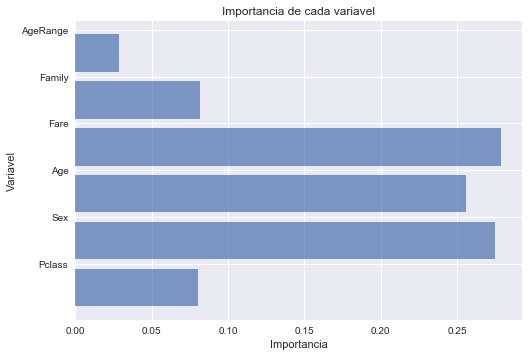

In [60]:
plt.barh(np.arange(len(feat_importance)), feat_importance, alpha=0.7)
plt.yticks(np.arange(.5,len(feat_importance),1), feat_importance.index)
plt.xlabel('Importancia')
plt.ylabel('Variavel')
plt.title('Importancia de cada variavel')

The importance hierarchy of each variable is very close to that obtained in the pearson correlation. Being Fare, Sex and Age are most correlated with the data.

## Comparing the result - Titanic_df vs Y_pred

A dataframe with the prediction (Y_pred) and X_test values will be created. It is a dataframe to simulate the result of the Titanic data set.

In [61]:
# Create dataframe
predicao_df = pd.DataFrame(X_test, columns=['Pclass','Sex', 'Age', 'Fare', 'Family','AgeRange'])
predicao_df['Predict'] = Y_pred
predicao_df['Survived'] = y_test

In [62]:
predicao_df.head()

Pclass  Sex        Age     Fare  Family  AgeRange  Predict  Survived
0     2.0  1.0  29.000000  21.0000     1.0       4.0        0         0
1     1.0  1.0  29.699118  30.5000     0.0       4.0        0         1
2     3.0  1.0  24.000000   7.4958     0.0       4.0        0         0
3     3.0  0.0  29.699118   7.7500     0.0       4.0        1         1
4     3.0  1.0  29.699118   7.7500     0.0       4.0        0         0

Checking the values for the new Predict column:

In [63]:
predicao_df.groupby(['Predict']).mean()

Pclass       Sex        Age       Fare    Family  AgeRange  \
Predict                                                                 
0        2.525862  0.827586  30.402388  19.902861  1.155172  2.672414   
1        1.857143  0.206349  28.590322  51.435979  1.047619  2.253968   

         Survived  
Predict            
0        0.146552  
1        0.809524

The same grouping, only using titanic_df as dataset:

In [64]:
titanic_df.groupby(['Survived']).mean()

Pclass        Age       Fare    Family    SexInt
Survived                                                    
0         2.531876  30.415100  22.917716  0.883424  0.852459
1         1.950292  28.549778  46.300019  0.938596  0.318713

As you can see, the figures are pretty rough. For example:
- For survivors the mean age was 29 and in the predicted model was 32;
- For the survivors the mean passage value was 46 and in the predicted model was 48.

For easy analysis, I'll re-plot Sex / Age / Pclass for the surviving passengers. 
First the passenger data of the titanic_df will be printed and following the predicao_df.

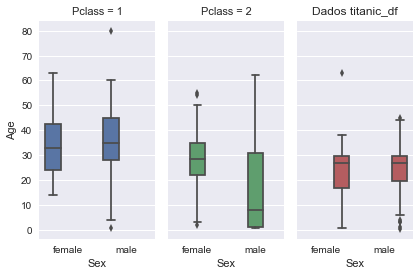

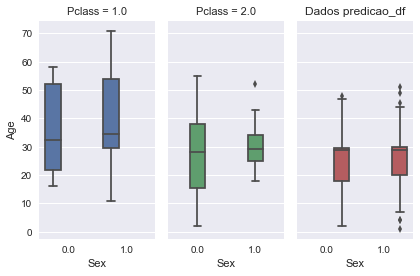

In [65]:
# Print chart with the bloxpot of the middle age by gender and class in the original dataframe titanic_df
sb.factorplot(x="Sex", y="Age", hue="Pclass",
               col="Pclass", data=sobreviventes, kind="box", size=4, aspect=.5)

plt.title("Dados titanic_df")  

# Print chart with the bloxpot of the middle age by gender and class in the dataframe predicao_df
predicao_sobrevivente = predicao_df[predicao_df['Predict']==1]
sb.factorplot(x="Sex", y="Age", hue="Pclass",
               col="Pclass", data=predicao_df, kind="box", size=4, aspect=.5)
plt.title("Dados predicao_df")  

In [66]:
# Mean group by Sex, Class Predict
predicao_df.groupby(['Sex','Pclass','Predict']).mean()['Age']

Sex  Pclass  Predict
0.0  1.0     1          35.543695
     2.0     0          50.000000
             1          26.149951
     3.0     0          25.678622
             1          23.206029
1.0  1.0     0          45.163019
             1          32.499599
     2.0     0          30.199945
     3.0     0          27.007980
             1          16.500000
Name: Age, dtype: float64

In [67]:
# Total survivors by Sex / Pclass
predicao_df.groupby(['Sex','Pclass','Predict']).count()['Age'].unstack()

Predict        0     1
Sex Pclass            
0.0 1.0      NaN  16.0
    2.0      1.0  18.0
    3.0     19.0  16.0
1.0 1.0     19.0  11.0
    2.0     16.0   NaN
    3.0     61.0   2.0

Analyzing the table above we can see that the model predicted survival for all 1st and 2nd Class passengers.

Filters:
- Sex = 0
- Pclass = 1 e 2
- Predict = 0(Died): Not a Number - NaN
- Predict = 1(Survived): 24 + 17

## Conclusion

After investigating the Titanic data set we found that women had a higher survival rate than men, that first and second class passengers also had better rates. In this scenario it was investigated whether a young adult in the 2nd class would survive, and we assumed, based on the data and prediction of Decision Tree and Random Forest models, that yes, that passenger would have a good chance of surviving.

## Limitations of the analysis

The observations, findings and results do not represent the reality of the facts, because we are only working with an incomplete sample of the data.

The sample has information on 891 passengers and it is known that 2,223 people were aboard the Titanic. The sum of dead is greater than the sample size:
- 832 - dead passengers
- 685 - crew members killed
- 706 - survivors, between passengers and crew

Another limitation of the analysis is the values that were assumed instead of the missing values that possibly affected the final result. Some information that was created to assist with the analysis:

1) Age: The null values were replaced by the general mean of the Age column.

2) Ticket Price: The highest ticket value was far from the second highest value, so I replaced the larger ticket with the second largest ticket. The zero values were replaced by the general mean of the Fare column.

The Cabin column was excluded from the analysis because it has many null values, but the values of this variable suggest a pattern that can be investigated in a new analysis. The same happens with the information on the treatment given to the passenger (Miss, Mrs, Mr, Master, Major and etc.), can we establish a standard for this column too? And would this treatment help predict outcomes? These are some questions that were not answered here and that, because they were hidden, may have interfered with the final result.

Although the supervised model Random Forest has applied well to this data, another model, such as support vector machine (SVM) can be tested if you are interested in extending this research.

A very important factor is that the data refer to humans and their behavior and decisions at the time of risk rely on many variables that are unknown by this analysis. For example, survivors reported the difficulty in convincing some passengers to board, I imagine that some women had difficulty leaving their husbands and older children, perhaps they did not even leave. The incorrect understanding of the captain's orders caused some men in a certain location of the ship to be authorized to embark and the men on the other side of the ship did not receive such authorization and eventually contributed to the reduction of the survival rate of the male gender.

Because there are so many variables and the lack of some information, we can even have fun in the investigation of the data, but we can not attribute a statistical value to this work.

Source: https://pt.wikipedia.org/wiki/RMS_Titanic
